In [1]:
import requests
from io import BytesIO

import torch
import numpy as np
from PIL import Image, ImageDraw

import sys
sys.path.append('..')

from kandinsky3 import get_inpainting_pipeline
from kandinsky3.utils import prepare_mask

[2024-04-03 22:49:58,410] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
device_map = torch.device('cuda:0')
dtype_map = {
    'unet': torch.float16,
    'text_encoder': torch.float16,
    'movq': torch.float32,
}

In [3]:
pipe = get_inpainting_pipeline(
    device_map, dtype_map,
)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/home/jovyan/.mlspace/envs/kandinsky4/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
w, h = 768, 768
shape = [(200, 100), (500, 700)] 
  
# creating new Image object 
mask_image = Image.new("L", (w, h)) 
  
# create rectangle image 
img1 = ImageDraw.Draw(mask_image)   
img1.rectangle(shape, fill ="#ffffff")

mask = prepare_mask(mask_image)

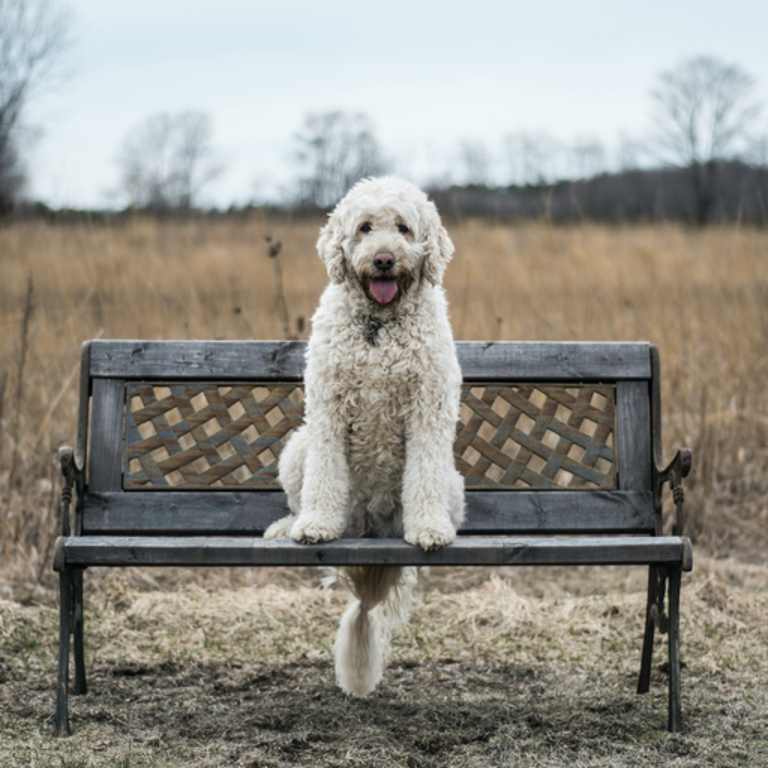

In [5]:
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"

image = download_image(img_url).resize((768, 768))
image

In [6]:
res = pipe("cheburashka sitting on a bench", image, mask)

/home/jovyan/.mlspace/envs/kandinsky4/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 50/50 [00:05<00:00,  9.84it/s]


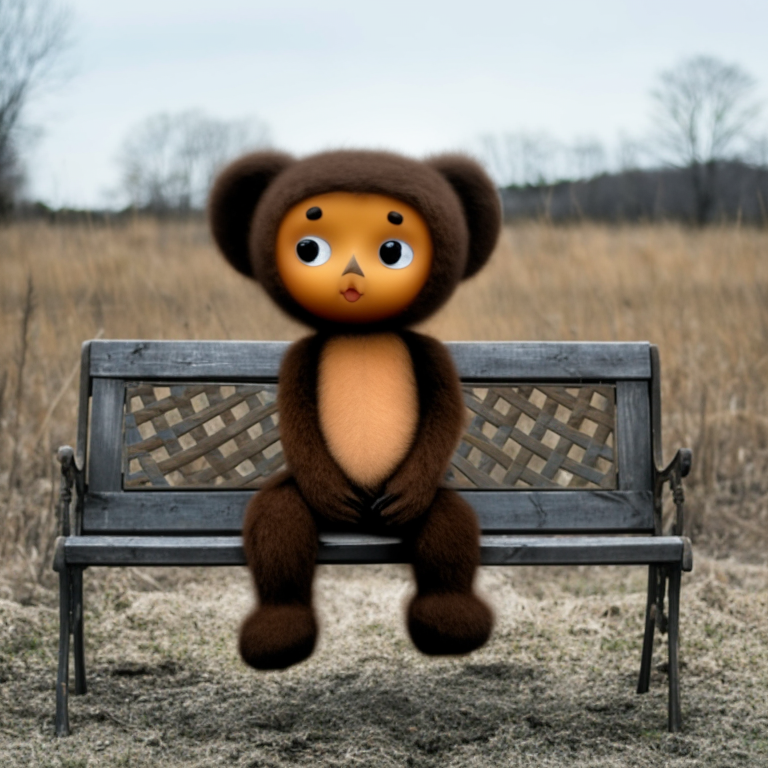

In [7]:
res[0]